### Problem Statement

words go here

In [1]:
#imports 
import pandas as pd
import re
import emoji
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# pip install emoji

In [3]:
# load data
reddits = pd.read_csv('../data/reddit_time.csv')

In [4]:

# boxplot function
def box_plot(df, column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('pink', 8))
    
    ax2.hist(df[column_name], color='pink', orientation='horizontal')
    ax1.set_title(column_name, fontsize=16)
    ax2.set_title(column_name, fontsize=16)
    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

### Data formatting

In [5]:
# string replaces

reddits.title = [t.replace ('¯\_(ツ)_/¯', ' ') for t in reddits.title]
reddits.title = [t.replace('\(^u^)/', ' ') for t in reddits.title]
reddits.title = [t.replace('●', ' ') for t in reddits.title]
reddits.title = reddits.title.apply(lambda x: emoji.\
                                       replace_emoji(x, replace=''))
reddits.title = reddits.title.replace('[^a-zA-Z0-9 ]', '', regex=True)
reddits.title = reddits.title.str.normalize('NFKD').str.encode('ascii', 
                                               errors='ignore').str.decode('utf-8')




In [6]:
# find and replace now empty titles with NaNs
reddits.title.replace('', float("NaN"), inplace=True)
reddits.dropna(subset = ['title'], inplace=True)

In [7]:
# number of words in a title
reddits['num_words'] = reddits.title.apply(lambda x: len(x.split(' ')))

In [8]:
# length of title string
reddits['title_length'] = reddits.title.apply(lambda x: len(x))

In [9]:
# convert datetime to seconds
reddits.length_time = reddits.length_time.apply(lambda x: pd.Timedelta(x).total_seconds())

In [10]:
reddits.dtypes

author           object
title            object
created         float64
num_comments      int64
subreddit        object
score             int64
upvote_ratio    float64
length_time     float64
num_words         int64
title_length      int64
dtype: object

### Summary statistics

In [11]:
# summary stats for num_comments
reddits.num_comments.describe()

count    13481.000000
mean       105.083228
std        488.477185
min          1.000000
25%         13.000000
50%         32.000000
75%         84.000000
max      26586.000000
Name: num_comments, dtype: float64

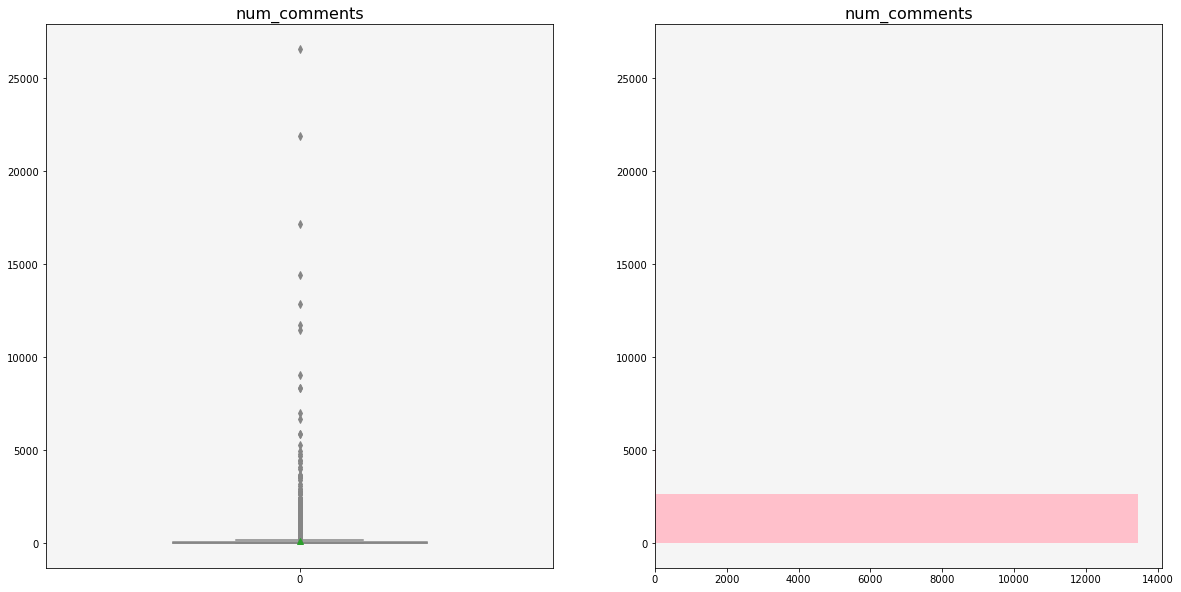

In [12]:
box_plot(reddits, 'num_comments')

In [13]:
#take a look at the data... 144 rows
reddits[reddits.num_comments > 1000].shape
# drop rows with values greater than 1000
reddits.drop(reddits[reddits.num_comments > 1000].index, inplace=True)


In [14]:
# reset index after dropping rows
reddits.reset_index(inplace=True, drop=True)

In [15]:
# stats summary for score
reddits.score.describe()

count     13337.000000
mean       1970.411862
std        5458.080448
min          75.000000
25%         327.000000
50%         689.000000
75%        1651.000000
max      265169.000000
Name: score, dtype: float64

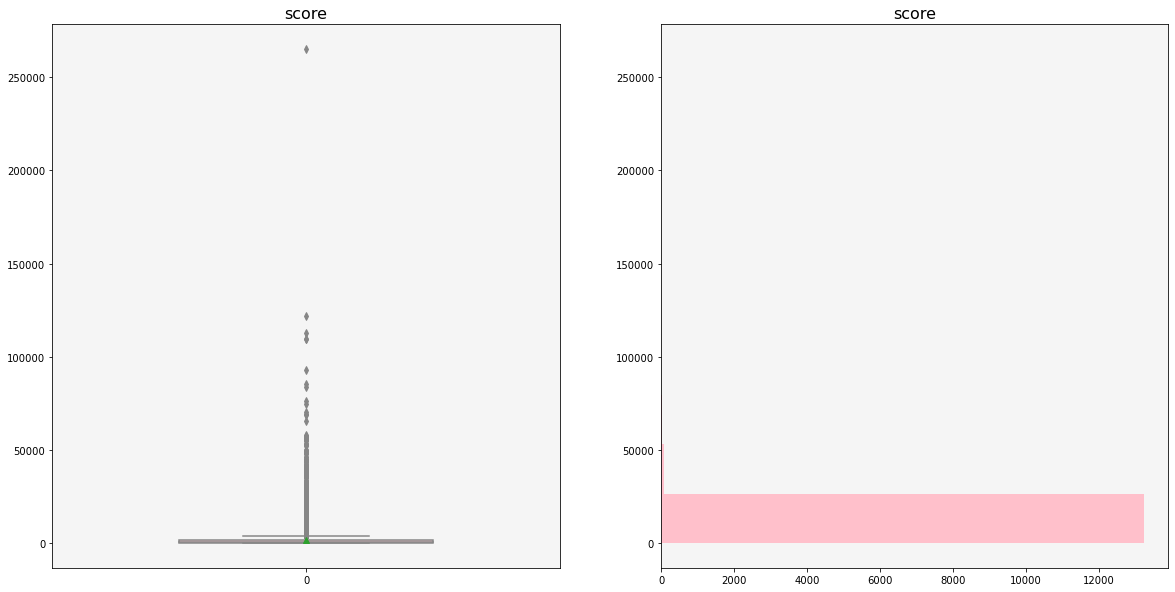

In [16]:
box_plot(reddits, 'score')

In [17]:
# take a look at the data... 1066 rows
reddits[reddits.score > 5000].shape
# drop rows with values greater than 5000 score
reddits.drop(reddits[reddits.score > 5000].index, inplace=True)


In [18]:
# reset index after dropping rows
reddits.reset_index(inplace=True, drop=True)

In [19]:
# summary stats for length of time
reddits.length_time.describe()

count     12277.000000
mean      80523.230572
std       50053.045468
min        2629.883409
25%       31943.884851
50%       73722.883815
75%      127527.875751
max      179606.872275
Name: length_time, dtype: float64

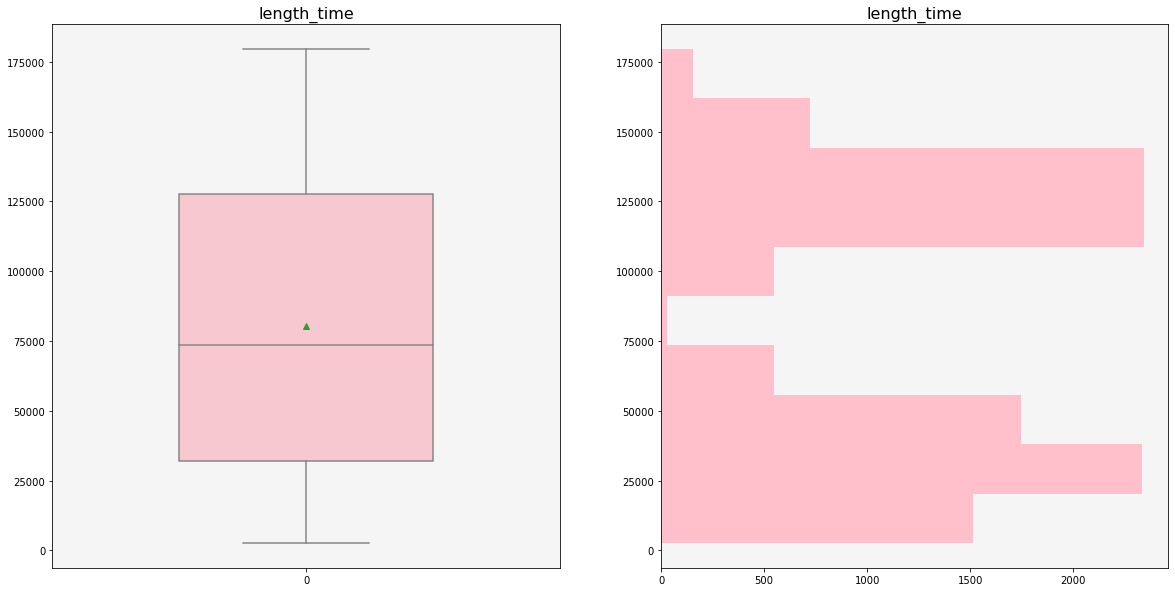

In [20]:
box_plot(reddits, 'length_time')

In [21]:
# summary statis for number of words
reddits.num_words.describe()

count    12277.000000
mean         9.521789
std          8.576812
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         63.000000
Name: num_words, dtype: float64

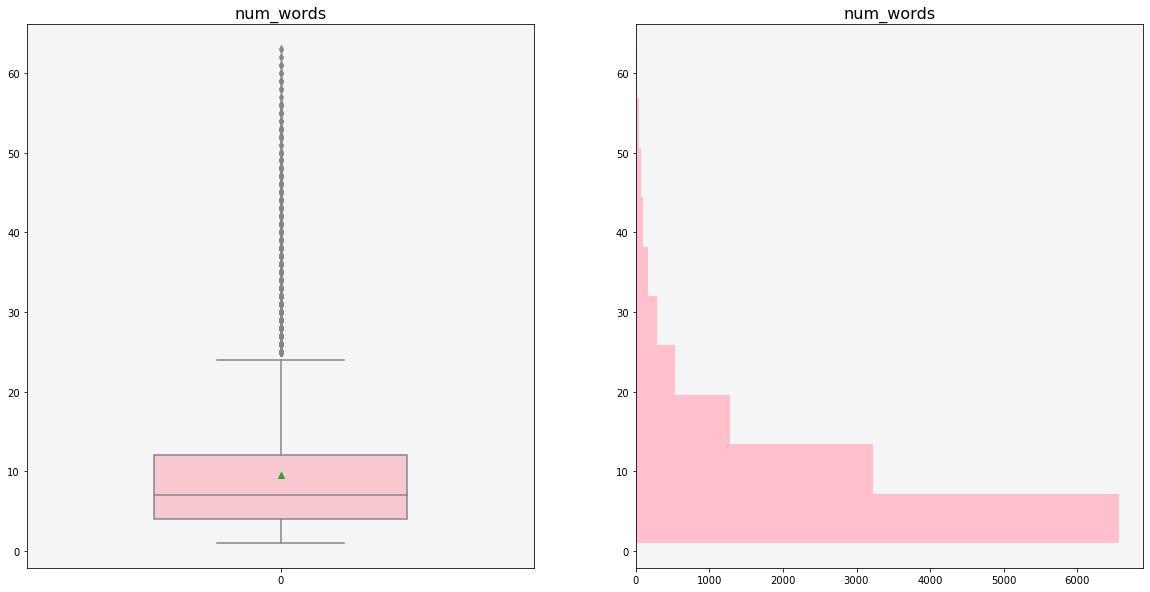

In [22]:
box_plot(reddits, 'num_words')

In [23]:
# summary stats for title length
reddits.title_length.describe()

count    12277.000000
mean        51.125112
std         46.742872
min          1.000000
25%         21.000000
50%         37.000000
75%         65.000000
max        300.000000
Name: title_length, dtype: float64

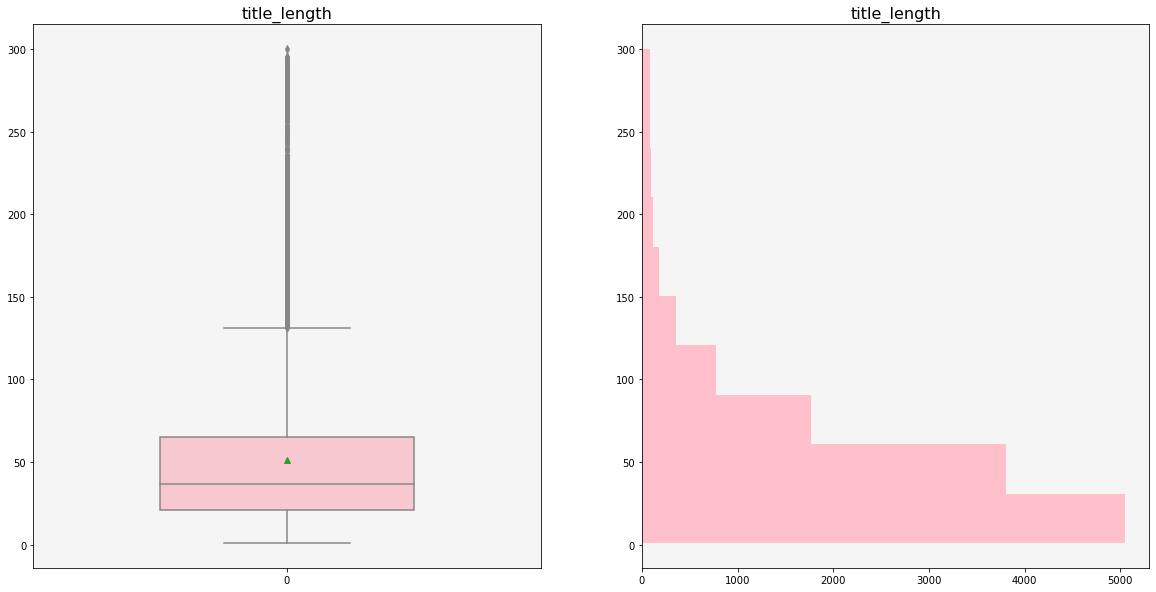

In [24]:
box_plot(reddits, 'title_length')

In [25]:
# write out to new csv
reddits.to_csv('../data/reddit_clean.csv', index=False, chunksize=1000)